### Importing datasets and Add the column names to both datasets

In [2]:
import pandas as pd 

customer_details=pd.read_csv('customer_details.csv')

In [3]:
customer_policy_details=pd.read_csv('customer_policy_details.csv')

In [4]:
customer_details.columns=['customer_id','Gender','age','driving licence present','region code','previously insured','vehicle age','vehicle damage']

In [5]:
customer_policy_details.columns=['customer_id','annual premium (in Rs)','sales channel code','vintage','response']

### Checking and Cleaning Data Quality:

##### Generate a summary of count of all the null values column wise

In [6]:
customer_details_null_values=customer_details.isnull()

In [7]:
customer_details_null_values_summary=customer_details_null_values.sum()

In [8]:
customer_details_null_values_summary

customer_id                386
Gender                     368
age                        368
driving licence present    393
region code                392
previously insured         381
vehicle age                381
vehicle damage             407
dtype: int64

In [9]:
customer_policy_details_null_values=customer_policy_details.isnull()

In [10]:
customer_policy_details_null_values_summary=customer_policy_details_null_values.sum()

In [11]:
customer_policy_details_null_values_summary

customer_id               387
annual premium (in Rs)    346
sales channel code        400
vintage                   388
response                  361
dtype: int64

##### Drop Null values for customer_id

In [12]:
customer_details.dropna(subset='customer_id',axis=0,inplace=True)
customer_details

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [13]:
customer_policy_details.dropna(subset='customer_id',axis=0,inplace=True)
customer_policy_details

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


##### Replace all null values for numeric columns by mean. 

In [14]:
# in custome_details age contains the only numerical values 
mean_age=int(customer_details['age'].mean())
print(mean_age)

38


In [15]:
customer_details['age'].fillna(mean_age,inplace=True)

In [16]:
# in custome_policy_details annual premium (in Rs) and vintage contains the numerical values 
customer_policy_details['annual premium (in Rs)'].fillna(customer_policy_details['annual premium (in Rs)'].mean(),inplace=True)

In [17]:
mean_vintage=int(customer_policy_details['vintage'].mean())
print(mean_vintage)

154


In [18]:
customer_policy_details['vintage'].fillna(mean_vintage,inplace=True)

##### Replace all null values for Categorical value by mode

In [19]:
# in custome_details other than age all are categorical columns
mode_Gender=customer_details['Gender'].mode()[0]

mode_licence_present=customer_details['driving licence present'].mode()[0]

mode_region_code=customer_details['region code'].mode()[0]

mode_previously_insured=customer_details['previously insured'].mode()[0]

mode_vehicle_age=customer_details['vehicle age'].mode()[0]

mode_vehicle_damage=customer_details['vehicle damage'].mode()[0]


In [20]:
customer_details['Gender'].fillna(mode_Gender,inplace=True)

In [21]:
customer_details['driving licence present'].fillna(mode_licence_present,inplace=True)

In [22]:
customer_details['region code'].fillna(mode_region_code,inplace=True)

In [23]:
customer_details['previously insured'].fillna(mode_previously_insured,inplace=True)

In [24]:
customer_details['vehicle age'].fillna(mode_vehicle_age,inplace=True)

In [25]:
customer_details['vehicle damage'].fillna(mode_vehicle_damage,inplace=True)

In [26]:
# in custome_policy_details sales channel code and response are categorical columns
customer_policy_details['sales channel code'].fillna(customer_policy_details['sales channel code'].mode()[0],inplace=True)
customer_policy_details['response'].fillna(customer_policy_details['response'].mode()[0],inplace=True)

##### Generate a summary of count of all the outliers column wise

In [27]:
# finding outliers range for customer details

In [28]:
Q=customer_details.describe()

In [29]:
Q1=Q.loc['25%']
Q1

customer_id                95269.5
age                           25.0
driving licence present        1.0
region code                   15.0
previously insured             0.0
Name: 25%, dtype: float64

In [30]:
Q3=Q.loc['75%']
Q3

customer_id                285822.5
age                            49.0
driving licence present         1.0
region code                    35.0
previously insured              1.0
Name: 75%, dtype: float64

In [31]:
IQR=Q3-Q1

In [32]:
IQR

customer_id                190553.0
age                            24.0
driving licence present         0.0
region code                    20.0
previously insured              1.0
dtype: float64

In [33]:
Lower_band=Q1-(1.5*(IQR))
Upper_band=Q3+(1.5*(IQR))
Lower_band

customer_id               -190560.0
age                           -11.0
driving licence present         1.0
region code                   -15.0
previously insured             -1.5
dtype: float64

In [34]:
Upper_band

customer_id                571652.0
age                            85.0
driving licence present         1.0
region code                    65.0
previously insured              2.5
dtype: float64

In [35]:
# count the no. of out liers

In [36]:
outliers=customer_details[(customer_details<Lower_band) | (customer_details>Upper_band)]

C:\Users\Shouvik\AppData\Local\Temp\ipykernel_4348\18624086.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers=customer_details[(customer_details<Lower_band) | (customer_details>Upper_band)]


In [37]:
outlier_count=outliers.count()

for i in outlier_count.index:
    print(f"The outlier for {i} is {outlier_count[i]}")

The outlier for customer_id is 0
The outlier for Gender is 0
The outlier for age is 0
The outlier for driving licence present is 811
The outlier for region code is 0
The outlier for previously insured is 0
The outlier for vehicle age is 0
The outlier for vehicle damage is 0


In [38]:
# it shows the outlier for driving licence present is 811 but as a categorical column it is not consided as a outlier
# We can conclude that , 811 customer don,t have a DL.

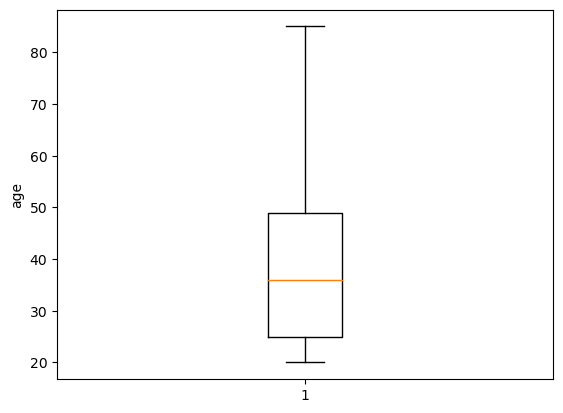

In [39]:
import matplotlib.pyplot as plt

plt.boxplot(customer_details['age'])
plt.ylabel('age')
plt.show()

In [40]:
# finding outliers range customer policy details

In [41]:
Qp=customer_policy_details.describe()

In [42]:
Qp1=Qp.loc['25%']
Qp1

customer_id               95276.25
annual premium (in Rs)    24416.00
sales channel code           29.00
vintage                      82.00
response                      0.00
Name: 25%, dtype: float64

In [43]:
Qp3=Qp.loc['75%']
Qp3

customer_id               285818.75
annual premium (in Rs)     39391.75
sales channel code           152.00
vintage                      227.00
response                       0.00
Name: 75%, dtype: float64

In [44]:
IQRp=Qp3-Qp1

In [45]:
IQRp

customer_id               190542.50
annual premium (in Rs)     14975.75
sales channel code           123.00
vintage                      145.00
response                       0.00
dtype: float64

In [46]:
Lower_bandp=Qp1-(1.5*(IQRp))
Upper_bandp=Qp3+(1.5*(IQRp))
Lower_bandp

customer_id              -190537.500
annual premium (in Rs)      1952.375
sales channel code          -155.500
vintage                     -135.500
response                       0.000
dtype: float64

In [47]:
Upper_bandp

customer_id               571632.500
annual premium (in Rs)     61855.375
sales channel code           336.500
vintage                      444.500
response                       0.000
dtype: float64

In [48]:
# count the no. of out liers

In [49]:
outliers_p=customer_policy_details[(customer_policy_details<Lower_bandp) | (customer_policy_details>Upper_bandp)]

In [50]:
outlier_count_p=outliers_p.count()

for j in outlier_count_p.index:
    print(f"The outlier for {j} is {outlier_count_p[j]}")

The outlier for customer_id is 0
The outlier for annual premium (in Rs) is 10332
The outlier for sales channel code is 0
The outlier for vintage is 0
The outlier for response is 46604


In [51]:
# In 'response' values = 1.0 is counted as a outlier.
# but response' is a categorical column so that there is no outlier practically.

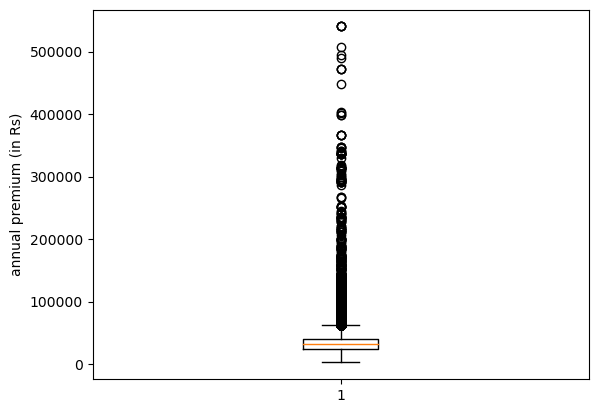

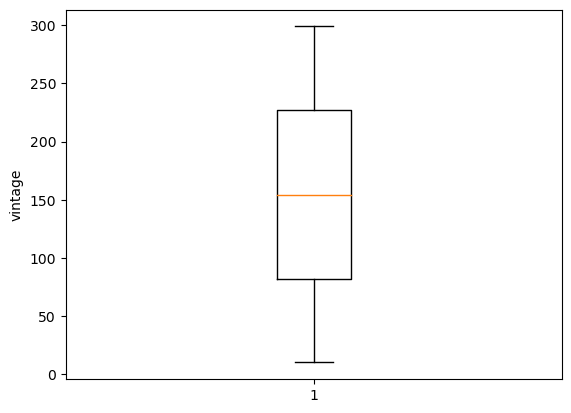

In [52]:
import matplotlib.pyplot as plt
# for numerical column
plt.boxplot(customer_policy_details['annual premium (in Rs)'])
plt.ylabel('annual premium (in Rs)')
plt.show()

plt.boxplot(customer_policy_details['vintage'])
plt.ylabel('vintage')
plt.show()


##### Replace all outlier values for numeric columns by mean. 

In [53]:
# though we have outliers only on the 'annual premium (in Rs)' in customer policy table so we change it with the mean

outlliers_amount=(customer_policy_details[((customer_policy_details['annual premium (in Rs)'])<(Lower_bandp['annual premium (in Rs)'])) | ((customer_policy_details['annual premium (in Rs)'])>(Upper_bandp['annual premium (in Rs)']))])['annual premium (in Rs)']

In [54]:
customer_policy_details.loc[outlliers_amount.index,'annual premium (in Rs)']=customer_policy_details['annual premium (in Rs)'].mean()

##### Remove white spaces

In [55]:
customer_details['vehicle age']=customer_details['vehicle age'].str.strip()

In [56]:
customer_details['vehicle age']=customer_details['vehicle age'].str.replace(" ","")

In [57]:
customer_details['vehicle age']

0         >2Years
1         1-2Year
2         >2Years
3          <1Year
4          <1Year
           ...   
381104    1-2Year
381105     <1Year
381106     <1Year
381107    >2Years
381108    1-2Year
Name: vehicle age, Length: 380723, dtype: object

##### case correction(lower) 

In [58]:
customer_details.columns=['customer_id','gender','age','driving licence present','region code','previously insured','vehicle age','vehicle damage']

In [59]:
def type_of(series):
    for value in series:
        if isinstance(value, str):
            return str


def chang_lower(df):
    for column in df.columns:
        col_type = type_of(df[column])
        if col_type == str:
            df[column] = df[column].str.lower()
    return df


In [60]:
chang_lower(customer_details)

,customer_id,gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,male,44.0,1.0,28.0,0.0,>2years,yes
1,2.0,male,76.0,1.0,3.0,0.0,1-2year,no
2,3.0,male,47.0,1.0,28.0,0.0,>2years,yes
3,4.0,male,21.0,1.0,11.0,1.0,<1year,no
4,5.0,female,29.0,1.0,41.0,1.0,<1year,no
...,...,...,...,...,...,...,...,...
381104,381105.0,male,74.0,1.0,26.0,1.0,1-2year,no
381105,381106.0,male,30.0,1.0,37.0,1.0,<1year,no
381106,381107.0,male,21.0,1.0,30.0,1.0,<1year,no
381107,381108.0,female,68.0,1.0,14.0,0.0,>2years,yes


In [61]:
chang_lower(customer_policy_details)

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


##### changing the data points into dummies as per needed

In [62]:
pd.get_dummies(customer_details,columns=['gender','vehicle age','vehicle damage'])

,customer_id,age,driving licence present,region code,previously insured,gender_female,gender_male,vehicle age_1-2year,vehicle age_<1year,vehicle age_>2years,vehicle damage_no,vehicle damage_yes
0,1.0,44.0,1.0,28.0,0.0,0,1,0,0,1,0,1
1,2.0,76.0,1.0,3.0,0.0,0,1,1,0,0,1,0
2,3.0,47.0,1.0,28.0,0.0,0,1,0,0,1,0,1
3,4.0,21.0,1.0,11.0,1.0,0,1,0,1,0,1,0
4,5.0,29.0,1.0,41.0,1.0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105.0,74.0,1.0,26.0,1.0,0,1,1,0,0,1,0
381105,381106.0,30.0,1.0,37.0,1.0,0,1,0,1,0,1,0
381106,381107.0,21.0,1.0,30.0,1.0,0,1,0,1,0,1,0
381107,381108.0,68.0,1.0,14.0,0.0,1,0,0,0,1,0,1


#####  Drop Duplicates (duplicated rows)

In [63]:
customer_details.drop_duplicates(inplace=True)

In [64]:
customer_policy_details.drop_duplicates(inplace=True)

### Create a Master table for future use. Join the customer table and customer_policy table to get a master table using customer_id in both tables.

In [65]:
master_table=pd.merge(customer_details,customer_policy_details,on='customer_id')
master_table

,customer_id,gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage,annual premium (in Rs),sales channel code,vintage,response
0,1.0,male,44.0,1.0,28.0,0.0,>2years,yes,40454.0,26.0,217.0,1.0
1,2.0,male,76.0,1.0,3.0,0.0,1-2year,no,33536.0,26.0,183.0,0.0
2,3.0,male,47.0,1.0,28.0,0.0,>2years,yes,38294.0,26.0,27.0,1.0
3,4.0,male,21.0,1.0,11.0,1.0,<1year,no,28619.0,152.0,203.0,0.0
4,5.0,female,29.0,1.0,41.0,1.0,<1year,no,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
380331,381105.0,male,74.0,1.0,26.0,1.0,1-2year,no,30170.0,26.0,88.0,0.0
380332,381106.0,male,30.0,1.0,37.0,1.0,<1year,no,40016.0,152.0,131.0,0.0
380333,381107.0,male,21.0,1.0,30.0,1.0,<1year,no,35118.0,160.0,161.0,0.0
380334,381108.0,female,68.0,1.0,14.0,0.0,>2years,yes,44617.0,124.0,74.0,0.0


### Company needs some important information from the master table to make decisions for future growth.

#####  i. Gender wise average annual premium

In [66]:
df1=master_table.groupby('gender')
df1['annual premium (in Rs)'].mean()

gender
female    29273.474247
male      29323.099677
Name: annual premium (in Rs), dtype: float64

###### ii. Age wise average annual premium 

In [67]:
df2=master_table.groupby('age')
df2['annual premium (in Rs)'].mean()

age
20.0    26342.073517
21.0    29751.791916
22.0    29946.848634
23.0    29838.344763
24.0    30125.557096
            ...     
81.0    29287.910702
82.0    36480.586199
83.0    28995.818172
84.0    35440.818182
85.0    26637.454525
Name: annual premium (in Rs), Length: 66, dtype: float64

###### iii. Is your data balanced between the genders?

In [68]:
df3=master_table.groupby('gender')['customer_id'].count()
df3

gender
female    174485
male      205851
Name: customer_id, dtype: int64

In [69]:
# No. of male customer higer than female customer but ratio is approximately 1 so we can data is balanced as per gender.

######  iv. Vehicle age wise average annual premium.  

In [70]:
df4=master_table.groupby('vehicle age')['annual premium (in Rs)'].mean()
df4

vehicle age
1-2year    29102.009839
<1year     29188.150594
>2years    32943.540830
Name: annual premium (in Rs), dtype: float64

### any relation between Person Age and annual premium

In [71]:
correlation=master_table['age'].corr(master_table['annual premium (in Rs)'])

print('The correlation between age and annual premium is ',correlation)

The correlation between age and annual premium is  0.05065409799611512


In [72]:
# so the correlation between age and annual premium is between 0.5 and -0.5 , so there is no relation between these column

In [75]:
master_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380336 entries, 0 to 380335
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   customer_id              380336 non-null  float64
 1   gender                   380336 non-null  object 
 2   age                      380336 non-null  float64
 3   driving licence present  380336 non-null  float64
 4   region code              380336 non-null  float64
 5   previously insured       380336 non-null  float64
 6   vehicle age              380336 non-null  object 
 7   vehicle damage           380336 non-null  object 
 8   annual premium (in Rs)   380336 non-null  float64
 9   sales channel code       380336 non-null  float64
 10  vintage                  380336 non-null  float64
 11  response                 380336 non-null  float64
dtypes: float64(9), object(3)
memory usage: 37.7+ MB


In [76]:
customer_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380723 entries, 0 to 381108
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   customer_id              380723 non-null  float64
 1   gender                   380723 non-null  object 
 2   age                      380723 non-null  float64
 3   driving licence present  380723 non-null  float64
 4   region code              380723 non-null  float64
 5   previously insured       380723 non-null  float64
 6   vehicle age              380723 non-null  object 
 7   vehicle damage           380723 non-null  object 
dtypes: float64(5), object(3)
memory usage: 26.1+ MB


In [77]:
customer_policy_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380722 entries, 0 to 381108
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer_id             380722 non-null  float64
 1   annual premium (in Rs)  380722 non-null  float64
 2   sales channel code      380722 non-null  float64
 3   vintage                 380722 non-null  float64
 4   response                380722 non-null  float64
dtypes: float64(5)
memory usage: 17.4 MB
